In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns 

In [2]:
match = pd.read_csv('Match.csv')
player = pd.read_csv('Player.csv')
stats = pd.read_csv('Stats.csv')
player['count'] = 0
match_results = pd.DataFrame()


In [3]:
match.head()

match_id      round        date  avg_minutes_game  avg_seconds_point  \
0  m_2019_A_0  1st Round  2019-01-14              4.81               46.8   
1  m_2019_A_1  1st Round  2019-01-14              3.95               35.7   
2  m_2019_A_2  1st Round  2019-01-14              4.86               42.3   
3  m_2019_A_3  1st Round  2019-01-14              4.43               43.3   
4  m_2019_A_4  1st Round  2019-01-14              4.37               39.7   

   avg_minutes_set       tournament  year  match_minutes  
0             43.3  Australian Open  2019          173.0  
1             40.5  Australian Open  2019          162.0  
2             43.8  Australian Open  2019          175.0  
3             41.0  Australian Open  2019          164.0  
4             43.7  Australian Open  2019          131.0

In [4]:
stats.head()

match_id   player_id     pts   rank  winner  sets    1    2    3    4  \
0  m_2019_A_0  atp_104731  4810.0    6.0    True   3.0  6.0  5.0  6.0  6.0   
1  m_2019_A_1  atp_105932  1820.0   20.0    True   3.0  6.0  4.0  7.0  6.0   
2  m_2019_A_2  atp_105430   585.0   98.0    True   3.0  3.0  6.0  6.0  6.0   
3  m_2019_A_3  atp_105882   401.0  137.0    True   3.0  6.0  6.0  6.0  6.0   
4  m_2019_A_4  atp_104269  1410.0   28.0    True   3.0  7.0  6.0  6.0  NaN   

   ...  service_pts  return_pts  aces  bp_saved  bp_faced  \
0  ...         73.0        51.0  14.0       5.0       7.0   
1  ...         92.0        50.0  11.0      10.0      15.0   
2  ...         73.0        59.0  10.0       8.0      13.0   
3  ...         82.0        45.0  23.0       5.0       6.0   
4  ...         63.0        47.0  21.0       1.0       2.0   

   first_serve_rtn_won  second_serve_rtn_won  first_serve_in  dbl_faults  \
0                 29.0                  22.0            71.0         5.0   
1                 17.0                  33.0            90.0         9.0   
2                 27.0                  32.0            90.0         1.0   
3                 16.0                  29.0            63.0         3.0   
4                 29.0                  18.0            58.0         6.0   

   first_serve_per  
0         0.645455  
1         0.620690  
2         0.720000  
3         0.543103  
4         0.666667  

[5 rows x 24 columns]

In [5]:
player.head()

player_id                 fullname hand country    birthday  count
0  atp_100001           Gardnar Mulloy    R     USA  1913-11-22      0
1  atp_100003            Frank Sedgman    R     AUS  1927-10-02      0
2  atp_100004           Giuseppe Merlo    R     ITA  1927-10-11      0
3  atp_100005  Richard Pancho Gonzales    R     USA  1928-05-09      0
4  atp_100006             Grant Golden    R     USA  1929-08-21      0

In [6]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10160 entries, 0 to 10159
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   match_id           10160 non-null  object 
 1   round              10160 non-null  object 
 2   date               10160 non-null  object 
 3   avg_minutes_game   10114 non-null  float64
 4   avg_seconds_point  10115 non-null  float64
 5   avg_minutes_set    10078 non-null  float64
 6   tournament         10160 non-null  object 
 7   year               10160 non-null  int64  
 8   match_minutes      10117 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 714.5+ KB


In [7]:
french_matches = match[match["tournament"]=='French Open']

In [8]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20240 entries, 0 to 20239
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              20240 non-null  object 
 1   player_id             20240 non-null  object 
 2   pts                   14398 non-null  float64
 3   rank                  20230 non-null  float64
 4   winner                20240 non-null  bool   
 5   sets                  20236 non-null  float64
 6   1                     20236 non-null  float64
 7   2                     20107 non-null  float64
 8   3                     19818 non-null  float64
 9   4                     9898 non-null   float64
 10  5                     3724 non-null   float64
 11  avg_odds              9852 non-null   float64
 12  max_odds              9852 non-null   float64
 13  total_pts             20234 non-null  float64
 14  service_pts           20234 non-null  float64
 15  return_pts         

In [9]:
merge_match_stats = pd.merge(left=french_matches, right=stats, left_on='match_id', right_on='match_id')

In [10]:
merge_match_stats[["match_id","player_id","winner","tournament","sets","year"]]

match_id   player_id  winner   tournament  sets  year
0       m_2019_F_0  atp_105227    True  French Open   3.0  2019
1       m_2019_F_0  atp_105341   False  French Open   0.0  2019
2       m_2019_F_1  atp_200615    True  French Open   3.0  2019
3       m_2019_F_1  atp_200005   False  French Open   1.0  2019
4       m_2019_F_2  atp_134770    True  French Open   3.0  2019
...            ...         ...     ...          ...   ...   ...
5061  m_2000_F_124  atp_103507   False  French Open   2.0  2000
5062  m_2000_F_125  atp_102796    True  French Open   3.0  2000
5063  m_2000_F_125  atp_102644   False  French Open   0.0  2000
5064  m_2000_F_126  atp_102856    True  French Open   3.0  2000
5065  m_2000_F_126  atp_102796   False  French Open   1.0  2000

[5066 rows x 6 columns]

In [11]:
merge_player = pd.merge(left=merge_match_stats, right=player, left_on='player_id', right_on='player_id')

In [12]:
merge_player[["match_id","player_id","fullname","winner","country","tournament","sets","date","year","count"]]

match_id   player_id             fullname  winner country  \
0       m_2019_F_0  atp_105227          Marin Cilic    True     CRO   
1      m_2019_F_74  atp_105227          Marin Cilic   False     CRO   
2      m_2018_F_40  atp_105227          Marin Cilic    True     CRO   
3      m_2018_F_79  atp_105227          Marin Cilic    True     CRO   
4     m_2018_F_109  atp_105227          Marin Cilic    True     CRO   
...            ...         ...                  ...     ...     ...   
5061   m_2000_F_94  atp_101727    Jason Stoltenberg    True     AUS   
5062   m_2000_F_98  atp_101727    Jason Stoltenberg   False     AUS   
5063   m_2000_F_60  atp_102238  Alberto Berasategui   False     ESP   
5064   m_2000_F_62  atp_102652      Christian Vinck    True     GER   
5065   m_2000_F_76  atp_102652      Christian Vinck   False     GER   

       tournament  sets        date  year  count  
0     French Open   3.0  2019-05-26  2019      0  
1     French Open   2.0  2019-05-29  2019      0  
2     French Open   3.0  2018-05-29  2018      0  
3     French Open   3.0  2018-05-31  2018      0  
4     French Open   3.0  2018-02-06  2018      0  
...           ...   ...         ...   ...    ...  
5061  French Open   3.0  2000-05-29  2000      0  
5062  French Open   0.0  2000-05-29  2000      0  
5063  French Open   2.0  2000-05-29  2000      0  
5064  French Open   3.0  2000-05-29  2000      0  
5065  French Open   0.0  2000-05-29  2000      0  

[5066 rows x 10 columns]

In [13]:
merge_player.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5066 entries, 0 to 5065
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   match_id              5066 non-null   object 
 1   round                 5066 non-null   object 
 2   date                  5066 non-null   object 
 3   avg_minutes_game      5064 non-null   float64
 4   avg_seconds_point     5066 non-null   float64
 5   avg_minutes_set       5040 non-null   float64
 6   tournament            5066 non-null   object 
 7   year                  5066 non-null   int64  
 8   match_minutes         5066 non-null   float64
 9   player_id             5066 non-null   object 
 10  pts                   3543 non-null   float64
 11  rank                  5063 non-null   float64
 12  winner                5066 non-null   bool   
 13  sets                  5066 non-null   float64
 14  1                     5064 non-null   float64
 15  2                    

In [14]:
merge_player_w = merge_player[merge_player.winner==True]
merge_player_l = merge_player[merge_player.winner==False]

In [15]:
french_win = merge_player_w[['tournament','fullname','count']]
french_lose = merge_player_l[['tournament','fullname','count']]

In [16]:
french_win

tournament           fullname  count
0     French Open        Marin Cilic      0
2     French Open        Marin Cilic      0
3     French Open        Marin Cilic      0
4     French Open        Marin Cilic      0
5     French Open        Marin Cilic      0
...           ...                ...    ...
5050  French Open   Richard Krajicek      0
5057  French Open  Orlin Stanoytchev      0
5060  French Open  Jason Stoltenberg      0
5061  French Open  Jason Stoltenberg      0
5064  French Open    Christian Vinck      0

[2533 rows x 3 columns]

In [17]:
french_win = french_win.groupby(['tournament', 'fullname']).count()
french_win = french_win.reset_index()
french_win.columns = ['tournament', 'fullname', 'Count_Win']

In [18]:
french_win

tournament            fullname  Count_Win
0    French Open       Adam Pavlasek          2
1    French Open    Adrian Mannarino          3
2    French Open        Adrian Ungur          1
3    French Open       Adrian Voinea          1
4    French Open     Agustin Calleri          3
..           ...                 ...        ...
385  French Open         Yen Hsun Lu          2
386  French Open  Yevgeny Kafelnikov         10
387  French Open  Yoshihito Nishioka          1
388  French Open   Younes El Aynaoui          7
389  French Open        Yuri Schukin          1

[390 rows x 3 columns]

In [19]:
french_lose = french_lose.groupby(['tournament', 'fullname']).count()
french_lose = french_lose.reset_index()
french_lose.columns = ['tournament', 'fullname', 'Count_Lose']

In [20]:
french_winner = pd.merge(french_win, french_lose, on=['tournament', 'fullname'])

In [21]:
french_winner

tournament            fullname  Count_Win  Count_Lose
0    French Open       Adam Pavlasek          2           2
1    French Open    Adrian Mannarino          3          11
2    French Open        Adrian Ungur          1           2
3    French Open       Adrian Voinea          1           3
4    French Open     Agustin Calleri          3           8
..           ...                 ...        ...         ...
385  French Open         Yen Hsun Lu          2           9
386  French Open  Yevgeny Kafelnikov         10           4
387  French Open  Yoshihito Nishioka          1           3
388  French Open   Younes El Aynaoui          7           4
389  French Open        Yuri Schukin          1           1

[390 rows x 4 columns]

In [22]:
french_winner['total_play'] = french_winner['Count_Win'] + french_winner['Count_Lose']
french_winner['perc_win'] = round(french_winner['Count_Win'] / french_winner['total_play'],4)*100
french_winner = french_winner[french_winner.total_play > 5]

In [23]:
french_winner.sort_values(by='perc_win', ascending=False).head(30)

tournament               fullname  Count_Win  Count_Lose  total_play  \
313  French Open           Rafael Nadal         93           2          95   
285  French Open         Novak Djokovic         68          14          82   
135  French Open        Gustavo Kuerten         24           5          29   
325  French Open          Roger Federer         70          16          86   
86   French Open          Dominic Thiem         24           6          30   
37   French Open            Andy Murray         39          10          49   
5    French Open           Albert Costa         18           5          23   
14   French Open          Alex Corretja         17           5          22   
199  French Open        Karen Khachanov         10           3          13   
186  French Open    Juan Carlos Ferrero         34          11          45   
345  French Open          Stan Wawrinka         42          14          56   
118  French Open           Gael Monfils         36          13          49   
72   French Open           David Ferrer         44          16          60   
251  French Open         Martin Verkerk          8           3          11   
372  French Open          Tommy Robredo         37          14          51   
177  French Open     Jo Wilfried Tsonga         28          11          39   
386  French Open     Yevgeny Kafelnikov         10           4          14   
18   French Open       Alexander Zverev         10           4          14   
75   French Open       David Nalbandian         20           8          28   
202  French Open          Kei Nishikori         22           9          31   
189  French Open  Juan Martin Del Potro         22           9          31   
133  French Open        Guillermo Coria         17           7          24   
120  French Open          Gaston Gaudio         19           8          27   
323  French Open        Robin Soderling         19           8          27   
270  French Open           Milos Raonic         14           6          20   
117  French Open       Franco Squillari          9           4          13   
58   French Open            Carlos Moya         20           9          29   
226  French Open            Marat Safin         20           9          29   
244  French Open            Mario Ancic         11           5          16   
240  French Open         Mariano Puerta         11           5          16   

     perc_win  
313     97.89  
285     82.93  
135     82.76  
325     81.40  
86      80.00  
37      79.59  
5       78.26  
14      77.27  
199     76.92  
186     75.56  
345     75.00  
118     73.47  
72      73.33  
251     72.73  
372     72.55  
177     71.79  
386     71.43  
18      71.43  
75      71.43  
202     70.97  
189     70.97  
133     70.83  
120     70.37  
323     70.37  
270     70.00  
117     69.23  
58      68.97  
226     68.97  
244     68.75  
240     68.75

In [24]:
top_french = french_winner[french_winner.tournament == 'French Open'].sort_values(by='perc_win', ascending = False).head(10)


Text(0.5, 1.0, 'Best players in French Open')

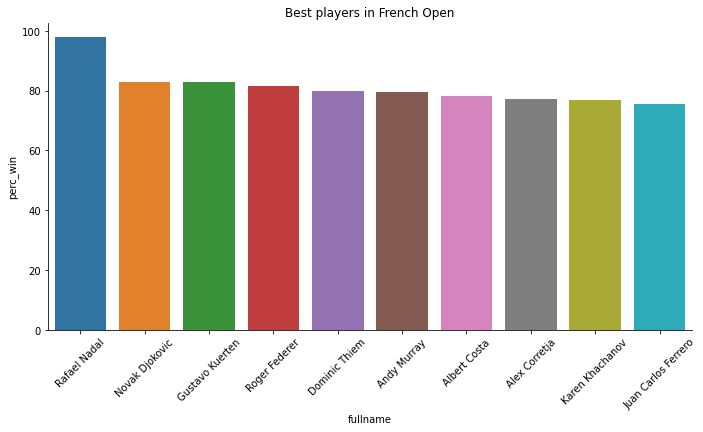

In [25]:
g=sns.catplot(x='fullname', y='perc_win', data=top_french, kind='bar', height=5, aspect=2)
g.set_xticklabels(labels = top_french.fullname,  rotation=45)
plot.title('Best players in French Open')

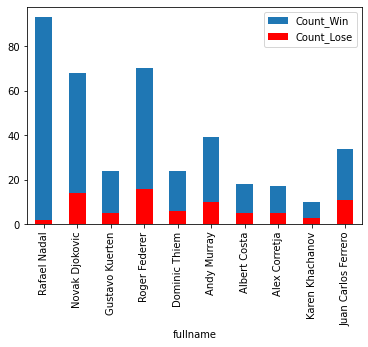

In [26]:
ax = plot.gca()
top_french.plot(x='fullname',y='Count_Win',kind='bar',ax=ax)
top_french.plot(x='fullname',y='Count_Lose',kind='bar',color = 'red',ax=ax)
top_french_win_lose = top_french.copy()

